In [6]:
import os 
import sys 
import json 
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix


sys.path.append("/Users/bobaebak/git/ai_text_detection")

from utils.file_helper import *
from utils.text_helper import *
from utils.plot_helper import *

In [4]:
# human data

# loads a tofel dataset
with open('../dataset/human/tofel.json', "r") as f:
    h_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/human/arxiv.json', "r") as f:
    h_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/human/student_essay.json', "r") as f:
    h_essay_dataset = json.load(f)

# loads student computer essay 
with open('../dataset/human/student_cs_essay.json', "r") as f:
    h_essay_cs_dataset = json.load(f)

In [6]:
# gpt data

# loads a tofel dataset
with open('../dataset/ai/gpt2medium_tofel.json', "r") as f:
    gpt_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/ai/gpt2medium_arxiv.json', "r") as f:
    gpt_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/ai/gpt2medium_essay.json', "r") as f:
    gpt_essay_dataset = json.load(f)

# loads student computer essay 
with open('../dataset/ai/gpt2medium_essay_cs.json', "r") as f:
    gpt_essay_cs_dataset = json.load(f)

# Tofel data distribution

In [8]:
h_tofel_dataset[:2]

[{'input': 'I prefer to cook at home. First of all, it is cheaper and safer than the restaurant. Because I can buy the things needed for cooking, and I can make sure that they are clean and fresh. Second, making a good dinner helps me obtain a sense of achievement. On every Spring festival, I always make dinner for my whole family, they always think that the meal is delicious and we can chat freely around the table. I am really proud of it and I think it can improve the relationship between my family and me.',
  'label': 'human'},
 {'input': 'The place I would like to visit most is the outer space，the place where most of the physical laws on the earth do not apply. It is interesting to see everything floating in the air. And the term “in the air” should also be modified simply because there is no air anyway. It is interesting to walk the distance in a whole new style. And it is interesting to see the mother planet from a whole new angle. This big blue crystal sphere，from the pictures t

In [9]:
gpt_tofel_dataset[:2]

[{'input': 'I prefer to cook at home. First of all, it is cheaper and safer than the restaurant. Because I can buy the things needed for cooking, I can cook more often. I also like to cook in the kitchen, because I can cook more quickly.\n\nI also like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I',
  'label': 'ai'},
 {'input': 'The place I would like to visit most is the outer space，the place where most of the physical laws on the 

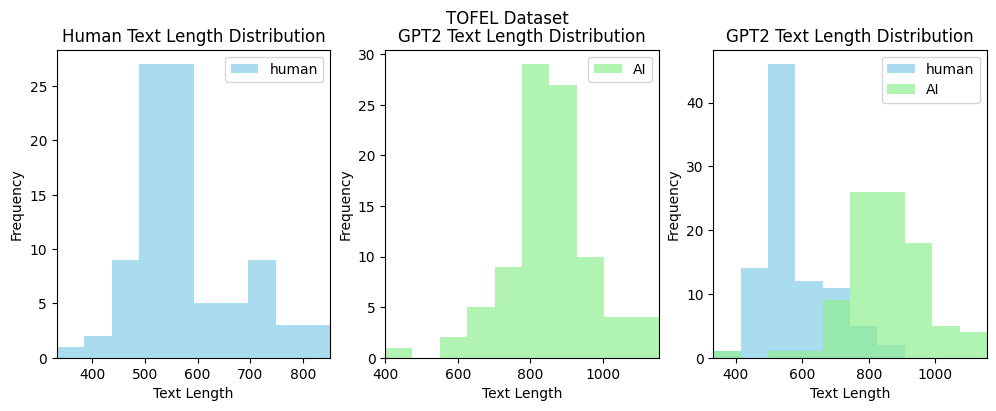

In [58]:
h_x = [len(item['input']) for item in h_tofel_dataset]
m_x = [len(item['input']) for item in gpt_tofel_dataset]

plot_helper = PlotHelper(
    row=1, col=3, figsize=(12,4), title="TOFEL Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(h_x), max(m_x)),
                 x=[h_x, m_x], 
                 args=[{"bins": np.linspace(min(h_x), max(m_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(h_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
    ]
)
_ = draws(plot_helper)

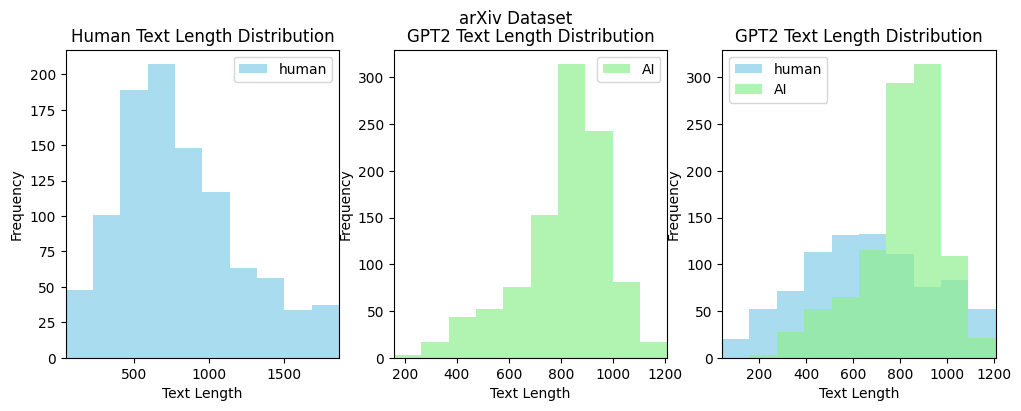

In [59]:
h_x = [len(item['input']) for item in h_arxiv_dataset]
m_x = [len(item['input']) for item in gpt_arxiv_dataset]

plot_helper = PlotHelper(
    row=1, col=3, figsize=(12,4), title="arXiv Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(h_x), max(m_x)),
                 x=[h_x, m_x], 
                 args=[{"bins": np.linspace(min(h_x), max(m_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(h_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
    ]
)
_ = draws(plot_helper)

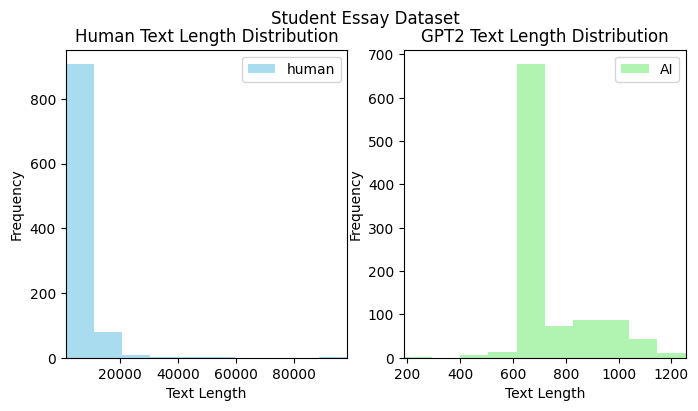

In [74]:
h_x = [len(item['input']) for item in h_essay_dataset]
m_x = [len(item['input']) for item in gpt_essay_dataset]

plot_helper = PlotHelper(
    row=1, col=2, figsize=(8,4), title="Student Essay Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        # PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
        #          xlim=(min(m_x), 20000),
        #          x=[h_x, m_x], 
        #          args=[{"bins": np.linspace(min(m_x), 20000, 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(h_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        # ),
    ]
)
_ = draws(plot_helper)

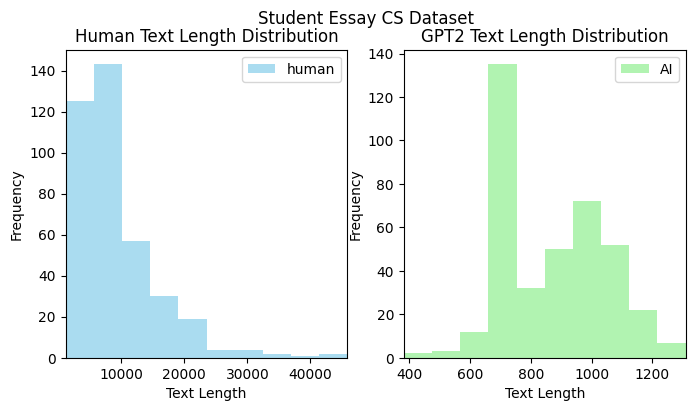

In [70]:
h_x = [len(item['input']) for item in h_essay_cs_dataset]
m_x = [len(item['input']) for item in gpt_essay_cs_dataset]

plot_helper = PlotHelper(
    row=1, col=2, figsize=(8,4), title="Student Essay CS Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        # PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
        #          xlim=(min(h_x), max(m_x)),
        #          x=[h_x, m_x], 
        #          args=[{"bins": np.linspace(min(m_x), 20000, 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(m_x), 20000, 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        # ),
    ]
)
_ = draws(plot_helper)

# Evaluation

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

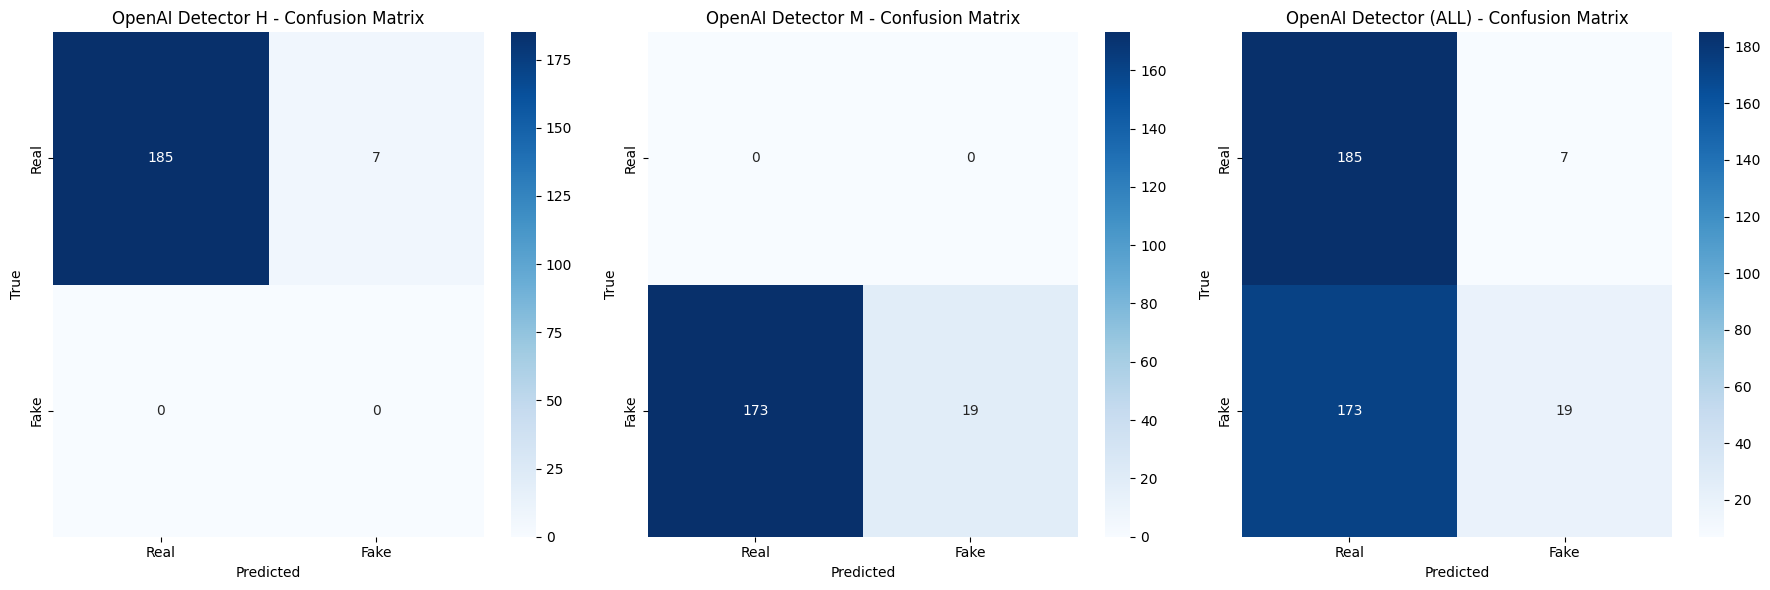

Accuracy: 0.53


In [26]:
# Load the datasets
with open('../dataset/eval/h_openai_eval.json', "r") as f:
    openai_detector_h = json.load(f)

with open('../dataset/eval/m_openai_eval.json', "r") as f:
    openai_detector_m = json.load(f)

# Process the first dataset
true_labels_h = ['Real' for _ in range(len(openai_detector_h))]

predicted_labels_h = []
for prob in openai_detector_h:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels_h.append('Real')
    else:
        predicted_labels_h.append('Fake')

conf_matrix_h = confusion_matrix(true_labels_h, predicted_labels_h, labels=['Real', 'Fake'])

# Process the second dataset
true_labels_m = ['Fake' for _ in range(len(openai_detector_m))]

predicted_labels_m = []
for prob in openai_detector_m:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels_m.append('Real')
    else:
        predicted_labels_m.append('Fake')

conf_matrix_m = confusion_matrix(true_labels_m, predicted_labels_m, labels=['Real', 'Fake'])

# Plot both confusion matrices side by side
plt.figure(figsize=(18, 6))

# Subplot for the first confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_h, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('OpenAI Detector H - Confusion Matrix')

# Subplot for the second confusion matrix
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('OpenAI Detector M - Confusion Matrix')

# Subplot for the second confusion matrix
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_m+conf_matrix_h, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('OpenAI Detector (ALL) - Confusion Matrix')


plt.tight_layout()
plt.show()


# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix_m+conf_matrix_h)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix_m+conf_matrix_h)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

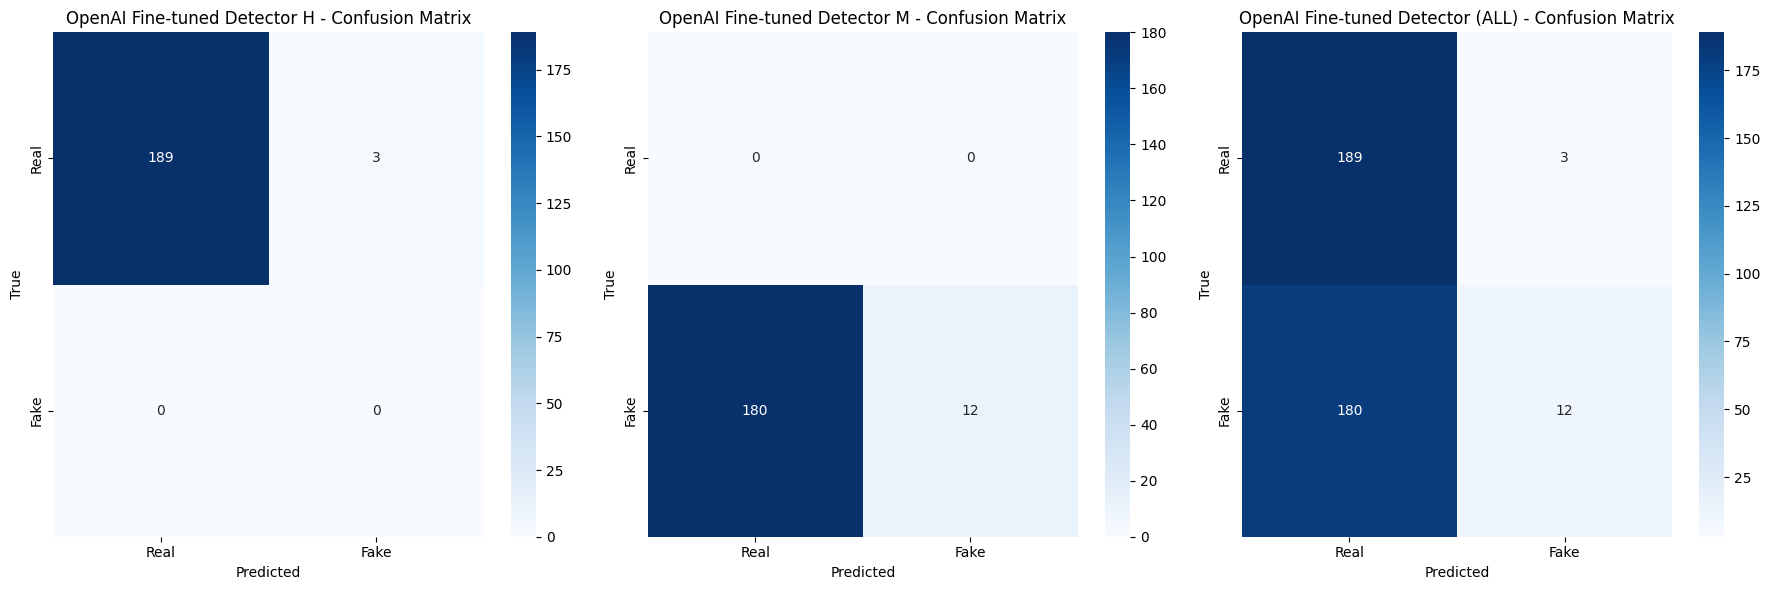

Accuracy: 0.52


In [24]:
# Load the datasets
with open('../dataset/eval/h_openai_finetuned_eval.json', "r") as f:
    openai_detector_h = json.load(f)

with open('../dataset/eval/m_openai_finetuned_eval.json', "r") as f:
    openai_detector_m = json.load(f)

# Process the first dataset
true_labels_h = ['Real' for _ in range(len(openai_detector_h))]

predicted_labels_h = []
for prob in openai_detector_h:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels_h.append('Real')
    else:
        predicted_labels_h.append('Fake')

conf_matrix_h = confusion_matrix(true_labels_h, predicted_labels_h, labels=['Real', 'Fake'])

# Process the second dataset
true_labels_m = ['Fake' for _ in range(len(openai_detector_m))]

predicted_labels_m = []
for prob in openai_detector_m:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels_m.append('Real')
    else:
        predicted_labels_m.append('Fake')

conf_matrix_m = confusion_matrix(true_labels_m, predicted_labels_m, labels=['Real', 'Fake'])

# Plot both confusion matrices side by side
plt.figure(figsize=(18, 6))

# Subplot for the first confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_h, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('OpenAI Fine-tuned Detector H - Confusion Matrix')

# Subplot for the second confusion matrix
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('OpenAI Fine-tuned Detector M - Confusion Matrix')

# Subplot for the second confusion matrix
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_m + conf_matrix_h, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('OpenAI Fine-tuned Detector (ALL) - Confusion Matrix')

plt.tight_layout()
plt.show()

# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix_m+conf_matrix_h)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix_m+conf_matrix_h)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

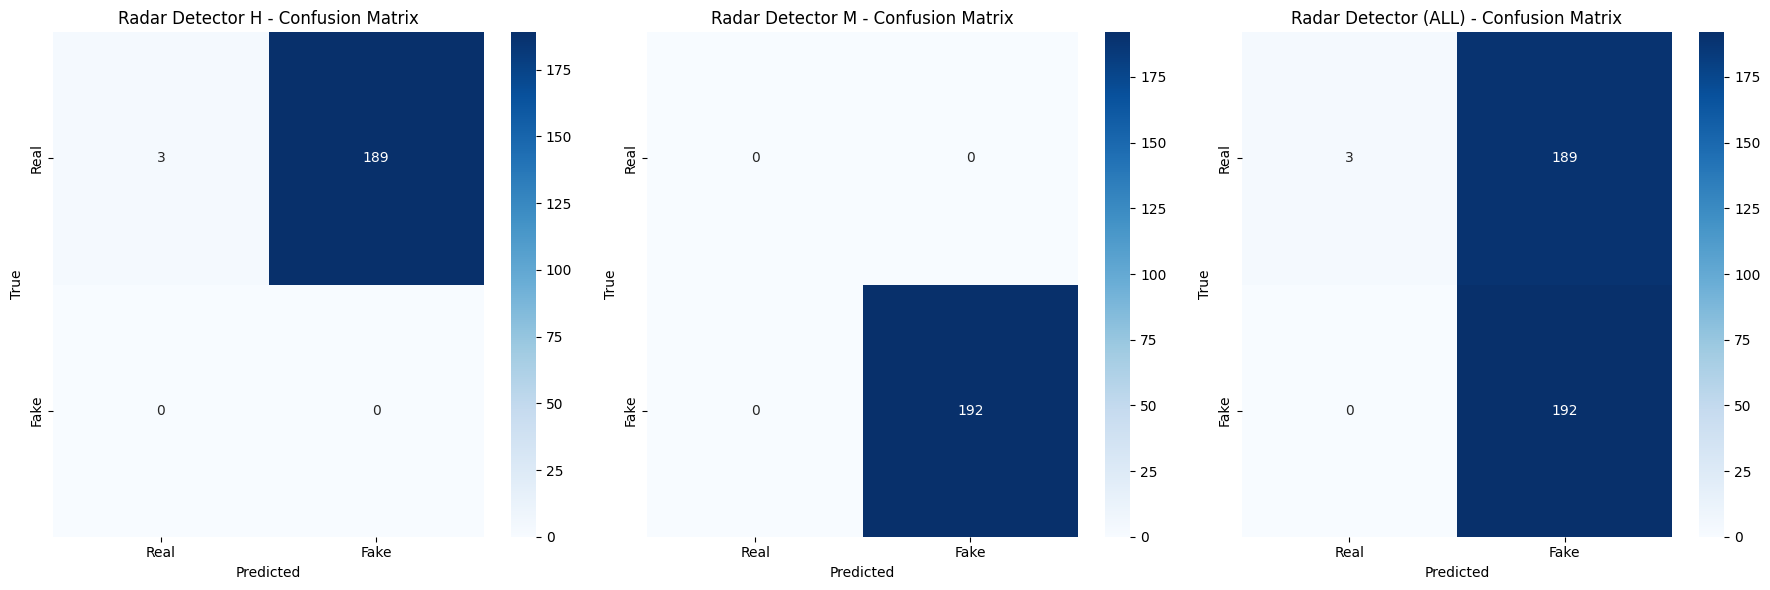

Accuracy: 0.51


In [25]:
# Load the datasets
with open('../dataset/eval/h_radar_eval.json', "r") as f:
    radar_eval_h = json.load(f)

with open('../dataset/eval/m_radar_eval.json', "r") as f:
    radar_eval_m = json.load(f)

# Process the first dataset
true_labels_h = ['Real' for _ in range(len(radar_eval_h))]

predicted_labels_h = []
for prob in radar_eval_h:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels_h.append('Real')
    else:
        predicted_labels_h.append('Fake')

conf_matrix_h = confusion_matrix(true_labels_h, predicted_labels_h, labels=['Real', 'Fake'])

# Process the second dataset
true_labels_m = ['Fake' for _ in range(len(radar_eval_m))]

predicted_labels_m = []
for prob in radar_eval_m:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels_m.append('Real')
    else:
        predicted_labels_m.append('Fake')

conf_matrix_m = confusion_matrix(true_labels_m, predicted_labels_m, labels=['Real', 'Fake'])

# Plot both confusion matrices side by side
plt.figure(figsize=(18, 6))

# Subplot for the first confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_h, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Radar Detector H - Confusion Matrix')

# Subplot for the second confusion matrix
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Radar Detector M - Confusion Matrix')

# Subplot for the second confusion matrix
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_m + conf_matrix_h, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Radar Detector (ALL) - Confusion Matrix')

plt.tight_layout()
plt.show()


# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix_m+conf_matrix_h)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix_m+conf_matrix_h)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")